### [Reference](https://github.com/krishnakartik1/LSTM-footballMatchWinner)

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

loc = "/datasets"

In [2]:
df = pd.read_csv('datasets/LaLiga_sort.csv', index_col=0)
df = df.reset_index()
df = df.drop(columns = ['index'])
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='ignore')
# df = df[df['season'] == '2015/2016
df = df.rename(columns={'date':'Date', 'home_team_api_id':'HomeTeam','away_team_api_id':'AwayTeam',
                        'home_team_goal':'FTHG','away_team_goal':'FTAG','Result':'FTR'})
df

,id,season,stage,Date,match_api_id,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,home_y_card,home_r_card,away_y_card,away_r_card,home_shoton,away_shoton,home_shotoff,away_shotoff,home_foulcommit,away_foulcommit,home_cross,away_cross,home_corner,away_corner,home_possession,away_possession,HTP,ATP,FTR
0,21525,2008/2009,1,2008-08-30,530090,RCD Espanyol,Real Valladolid,1,0,2.00,3.30,3.80,4,0,4,0,3,7,5,4,17,16,9,18,1,9,46,54,0,0,H
1,21518,2008/2009,1,2008-08-30,530023,Valencia CF,RCD Mallorca,3,0,1.70,3.60,5.25,4,0,0,0,5,4,8,10,16,14,15,9,5,6,52,48,0,0,H
2,21526,2008/2009,1,2008-08-31,530091,Athletic Club de Bilbao,UD Almería,1,3,2.00,3.30,3.80,2,0,2,0,0,0,0,0,0,0,0,0,0,0,46,54,0,0,A
3,21527,2008/2009,1,2008-08-31,530092,Atlético Madrid,Málaga CF,4,0,1.44,4.20,7.50,1,0,1,0,0,0,0,0,0,0,0,0,0,0,46,54,0,0,H
4,21519,2008/2009,1,2008-08-31,530084,CA Osasuna,Villarreal CF,1,1,2.80,3.30,2.50,2,1,1,1,0,0,0,0,0,0,0,0,0,0,52,48,0,0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,24495,2015/2016,38,2016-05-15,2030535,Málaga CF,UD Las Palmas,4,1,1.80,3.75,4.50,1,0,1,0,8,7,1,3,16,10,16,12,3,6,42,58,45,44,H
3036,24492,2015/2016,38,2016-05-15,2030532,RCD Espanyol,SD Eibar,4,2,2.00,3.60,3.70,4,0,3,0,3,8,3,3,9,13,7,23,3,4,53,47,40,43,H
3037,24497,2015/2016,38,2016-05-15,2030537,Rayo Vallecano,Levante UD,3,1,1.33,5.25,9.00,1,0,3,0,10,3,6,4,12,9,17,14,9,3,50,50,35,32,H
3038,24491,2015/2016,38,2016-05-15,2030531,Real Betis Balompié,Getafe CF,2,1,5.00,3.80,1.70,1,0,8,1,5,6,2,7,8,26,12,19,3,2,60,40,42,36,H


In [3]:
# raw_data_1=pd.read_csv(loc+"2017-18.csv")
raw_data_1516 = df[df['season'] == '2015/2016']
raw_data_1415 = df[df['season'] == '2014/2015']
raw_data_1314 = df[df['season'] == '2013/2014']
raw_data_1213 = df[df['season'] == '2012/2013']
raw_data_1112 = df[df['season'] == '2011/2012']
raw_data_1011 = df[df['season'] == '2010/2011']
raw_data_0910 = df[df['season'] == '2009/2010']
raw_data_0809 = df[df['season'] == '2008/2009']

In [4]:
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

In [5]:
playing_statistics_1516=raw_data_1516[columns_req]
playing_statistics_1415=raw_data_1415[columns_req]
playing_statistics_1314=raw_data_1314[columns_req]
playing_statistics_1213=raw_data_1213[columns_req]
playing_statistics_1112=raw_data_1112[columns_req]
playing_statistics_1011=raw_data_1011[columns_req]
playing_statistics_0910=raw_data_0910[columns_req]
playing_statistics_0809=raw_data_0809[columns_req]
playing_statistics_1516.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
2660,2015-08-21,Málaga CF,Sevilla FC,0,0,D
2661,2015-08-22,Atlético Madrid,UD Las Palmas,1,0,H
2662,2015-08-22,RC Deportivo de La Coruña,Real Sociedad,0,0,D
2663,2015-08-22,RCD Espanyol,Getafe CF,1,0,H
2664,2015-08-22,Rayo Vallecano,Valencia CF,0,0,D


In [6]:
def get_goals_scored(playing_stat):
    print("get_goals_scored")
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
#         print("check {} \n".format(i))
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']
        ATGS = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
        
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored



# Gets the goals conceded agg arranged by teams and matchweek
def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
#         print("check {} \n".format(i))
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,len(teams["RCD Espanyol"])+1):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded

def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)
   
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1)% 10) == 0:
            j = j + 1
    
#     print("check line 87")
#     print(playing_stat.shape,len(HTGS))
    
    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC
    
    return playing_stat

# Apply to each dataset
playing_statistics_1516=get_gss(playing_statistics_1516)
playing_statistics_1415=get_gss(playing_statistics_1415)
playing_statistics_1314=get_gss(playing_statistics_1314)
playing_statistics_1213=get_gss(playing_statistics_1213)
playing_statistics_1112=get_gss(playing_statistics_1112)
playing_statistics_1011=get_gss(playing_statistics_1011)
playing_statistics_0910=get_gss(playing_statistics_0910)
playing_statistics_0809=get_gss(playing_statistics_0809)

get_goals_scored
get_goals_scored
get_goals_scored
get_goals_scored
get_goals_scored
get_goals_scored
get_goals_scored
get_goals_scored


In [7]:
playing_statistics_1516.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC
3035,2016-05-15,Málaga CF,UD Las Palmas,4,1,H,34,44,34,49
3036,2016-05-15,RCD Espanyol,SD Eibar,4,2,H,36,47,72,57
3037,2016-05-15,Rayo Vallecano,Levante UD,3,1,H,49,36,72,67
3038,2016-05-15,Real Betis Balompié,Getafe CF,2,1,H,32,36,51,65
3039,2016-05-15,Real Sporting de Gijón,Villarreal CF,2,0,H,38,44,62,33


In [8]:
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0
    

def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,31):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
        
    matchres_points.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    return matchres_points


def get_matchres(playing_stat):
#     print("here")
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
            
    return pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T

def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat
    
# Apply to each dataset
playing_statistics_1516=get_agg_points(playing_statistics_1516)
playing_statistics_1415=get_agg_points(playing_statistics_1415)
playing_statistics_1314=get_agg_points(playing_statistics_1314)
playing_statistics_1213=get_agg_points(playing_statistics_1213)
playing_statistics_1112=get_agg_points(playing_statistics_1112)
playing_statistics_1011=get_agg_points(playing_statistics_1011)
playing_statistics_0910=get_agg_points(playing_statistics_0910)
playing_statistics_0809=get_agg_points(playing_statistics_0809)

In [9]:
playing_statistics_1516.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP
3035,2016-05-15,Málaga CF,UD Las Palmas,4,1,H,34,44,34,49,0,1
3036,2016-05-15,RCD Espanyol,SD Eibar,4,2,H,36,47,72,57,0,1
3037,2016-05-15,Rayo Vallecano,Levante UD,3,1,H,49,36,72,67,0,3
3038,2016-05-15,Real Betis Balompié,Getafe CF,2,1,H,32,36,51,65,1,1
3039,2016-05-15,Real Sporting de Gijón,Villarreal CF,2,0,H,38,44,62,33,1,0


In [10]:
def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num,39):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1           
    return form_final

def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    h = ['M' for i in range(num * 10)]  # since form is not available for n MW (n*10)
    a = ['M' for i in range(num * 10)]
    
    j = num
    for i in range((num*10),380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        
        past = form.loc[ht][j]               # get past n results
        h.append(past[num-1])                    # 0 index is most recent
        
        past = form.loc[at][j]               # get past n results.
        a.append(past[num-1])                   # 0 index is most recent
        
        if ((i + 1)% 10) == 0:
            j = j + 1
    
    playing_stat['HM' + str(num)] = h[:playing_stat.shape[0]]                 
    playing_stat['AM' + str(num)] = a[:playing_stat.shape[0]]

    
    return playing_stat


def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    playing_statistics = add_form(playing_statistics,4)
    playing_statistics = add_form(playing_statistics,5)
    return playing_statistics    
    
# Make changes to df
playing_statistics_1516=add_form_df(playing_statistics_1516)
playing_statistics_1415=add_form_df(playing_statistics_1415)
playing_statistics_1314=add_form_df(playing_statistics_1314)
playing_statistics_1213=add_form_df(playing_statistics_1213)
playing_statistics_1112=add_form_df(playing_statistics_1112)
playing_statistics_1011=add_form_df(playing_statistics_1011)
playing_statistics_0910=add_form_df(playing_statistics_0910)
playing_statistics_0809=add_form_df(playing_statistics_0809)

In [11]:
playing_statistics_1516

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5
2660,2015-08-21,Málaga CF,Sevilla FC,0,0,D,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M
2661,2015-08-22,Atlético Madrid,UD Las Palmas,1,0,H,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M
2662,2015-08-22,RC Deportivo de La Coruña,Real Sociedad,0,0,D,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M
2663,2015-08-22,RCD Espanyol,Getafe CF,1,0,H,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M
2664,2015-08-22,Rayo Vallecano,Valencia CF,0,0,D,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,2016-05-15,Málaga CF,UD Las Palmas,4,1,H,34,44,34,49,0,1,L,D,W,L,L,W,D,L,L,D
3036,2016-05-15,RCD Espanyol,SD Eibar,4,2,H,36,47,72,57,0,1,L,D,W,L,L,D,D,L,L,W
3037,2016-05-15,Rayo Vallecano,Levante UD,3,1,H,49,36,72,67,0,3,L,W,L,L,L,D,D,L,W,W
3038,2016-05-15,Real Betis Balompié,Getafe CF,2,1,H,32,36,51,65,1,1,D,D,L,W,L,D,W,W,D,L


In [12]:
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]

playing_statistics_1516=playing_statistics_1516[cols]
playing_statistics_1415=playing_statistics_1415[cols]
playing_statistics_1314=playing_statistics_1314[cols]
playing_statistics_1213=playing_statistics_1213[cols]
playing_statistics_1112=playing_statistics_1112[cols]
playing_statistics_1011=playing_statistics_1011[cols]
playing_statistics_0910=playing_statistics_0910[cols]
playing_statistics_0809=playing_statistics_0809[cols]

In [13]:
playing_statistics_1516.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5
3035,2016-05-15,Málaga CF,UD Las Palmas,4,1,H,34,44,34,49,0,1,L,W,L,D,L,D,L,W,L,D
3036,2016-05-15,RCD Espanyol,SD Eibar,4,2,H,36,47,72,57,0,1,L,W,L,D,L,D,L,D,L,W
3037,2016-05-15,Rayo Vallecano,Levante UD,3,1,H,49,36,72,67,0,3,L,L,L,D,W,W,L,D,L,W
3038,2016-05-15,Real Betis Balompié,Getafe CF,2,1,H,32,36,51,65,1,1,D,L,L,W,D,D,W,D,W,L
3039,2016-05-15,Real Sporting de Gijón,Villarreal CF,2,0,H,38,44,62,33,1,0,D,W,L,W,D,L,W,D,L,L


In [14]:
# playing_statistics_1516.HomeTeam.unique()

In [15]:
# Standings.index.unique()

In [16]:
Standings = pd.read_csv("datasets/LALIGAStandings.csv", encoding='latin-1')
Standings.set_index(['Team'], inplace=True)
Standings = Standings.fillna(18)
Standings = Standings.rename(index={"MÃ¡laga CF": "Málaga CF", "UD AlmerÃ­a": "UD Almería"})
Standings = Standings.astype(int)
# print(Standings)

def get_last(playing_stat, Standings, year):
    HomeTeamLP = []
    AwayTeamLP = []
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HomeTeamLP.append(Standings.loc[ht][year])
        AwayTeamLP.append(Standings.loc[at][year])
    playing_stat['HomeTeamLP'] = HomeTeamLP
    playing_stat['AwayTeamLP'] = AwayTeamLP
    return playing_stat

playing_statistics_1516 = get_last(playing_statistics_1516, Standings, "2014")
playing_statistics_1415 = get_last(playing_statistics_1415, Standings, "2013")
playing_statistics_1314 = get_last(playing_statistics_1314, Standings, "2012")
playing_statistics_1213 = get_last(playing_statistics_1213, Standings, "2011")
playing_statistics_1112 = get_last(playing_statistics_1112, Standings, "2010")
playing_statistics_1011 = get_last(playing_statistics_1011, Standings, "2009")
playing_statistics_0910 = get_last(playing_statistics_0910, Standings, "2008")
playing_statistics_0809 = get_last(playing_statistics_0809, Standings, "2007")

In [17]:
playing_statistics_1516.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HomeTeamLP,AwayTeamLP
2660,2015-08-21,Málaga CF,Sevilla FC,0,0,D,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,9,5
2661,2015-08-22,Atlético Madrid,UD Las Palmas,1,0,H,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,3,18
2662,2015-08-22,RC Deportivo de La Coruña,Real Sociedad,0,0,D,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,18,12
2663,2015-08-22,RCD Espanyol,Getafe CF,1,0,H,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,10,15
2664,2015-08-22,Rayo Vallecano,Valencia CF,0,0,D,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,11,4


In [18]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

playing_statistics_1516 = get_mw(playing_statistics_1516)
playing_statistics_1415 = get_mw(playing_statistics_1415)
playing_statistics_1314 = get_mw(playing_statistics_1314)
playing_statistics_1213 = get_mw(playing_statistics_1213)
playing_statistics_1112 = get_mw(playing_statistics_1112)
playing_statistics_1011 = get_mw(playing_statistics_1011)
playing_statistics_0910 = get_mw(playing_statistics_0910)
playing_statistics_0809 = get_mw(playing_statistics_0809)

In [19]:
playing_stat = pd.concat([playing_statistics_1516,
                         playing_statistics_1415,
                         playing_statistics_1314,
                         playing_statistics_1213,
                         playing_statistics_1112,
                         playing_statistics_1011,
                         playing_statistics_0910,
                         playing_statistics_0809], ignore_index=True)


# Gets the form points.
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']

playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)

# Identify Win/Loss Streaks if any.
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0
    
playing_stat['HTWinStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ws)
playing_stat['HTWinStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ws)
playing_stat['HTLossStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ls)
playing_stat['HTLossStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ls)

playing_stat['ATWinStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ws)
playing_stat['ATWinStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ws)
playing_stat['ATLossStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ls)
playing_stat['ATLossStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ls)

playing_stat.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'HomeTeamLP', 'AwayTeamLP', 'MW',
       'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts', 'ATFormPts',
       'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
       'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

In [20]:
# Get Goal Difference
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']

# Diff in points
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']

# Diff in last year positions
playing_stat['DiffLP'] = playing_stat['HomeTeamLP'] - playing_stat['AwayTeamLP']

In [21]:
playing_stat.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HomeTeamLP,AwayTeamLP,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,2015-08-21,Málaga CF,Sevilla FC,0,0,D,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,9,5,1,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1,2015-08-22,Atlético Madrid,UD Las Palmas,1,0,H,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,3,18,1,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-15
2,2015-08-22,RC Deportivo de La Coruña,Real Sociedad,0,0,D,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,18,12,1,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
3,2015-08-22,RCD Espanyol,Getafe CF,1,0,H,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,10,15,1,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-5
4,2015-08-22,Rayo Vallecano,Valencia CF,0,0,D,0,0,0,0,0,0,M,M,M,M,M,M,M,M,M,M,11,4,1,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7


In [22]:
playing_stat=playing_stat.drop(["Date","HomeTeam","AwayTeam","HomeTeamLP","AwayTeamLP","HTFormPts","ATFormPts",
                                "FTHG","FTAG","HTFormPtsStr","ATFormPtsStr"],axis=1)
playing_stat.tail()

,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
3035,A,38,52,67,39,0,3,L,W,D,W,L,W,D,W,W,L,38,0,0,0,0,0,0,0,0,-29,13,-3,-3,13
3036,H,43,55,49,56,3,1,W,W,L,W,W,D,L,W,L,D,38,0,0,0,0,0,0,0,0,-6,-1,2,7,-6
3037,D,48,49,47,55,3,3,W,W,L,L,L,W,D,W,L,L,38,0,0,1,0,0,0,0,0,1,-6,0,-1,-8
3038,D,50,45,57,57,1,0,D,W,L,L,L,L,L,D,L,D,38,0,0,1,0,0,0,0,0,-7,-12,1,2,-2
3039,H,45,33,78,55,3,0,W,W,L,D,L,L,L,L,W,L,38,0,0,0,0,0,0,0,0,-33,-22,3,4,0


In [23]:
playing_stat.keys()

Index(['FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2',
       'HM3', 'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW',
       'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
       'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP'],
      dtype='object')

In [24]:
# Scale DiffPts , DiffFormPts, HTGD, ATGD by Matchweek.
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']

In [25]:
playing_stat.MW = playing_stat.MW.astype(float)

for col in cols:
    playing_stat[col] = playing_stat[col] / playing_stat.MW

In [26]:
# playing_stat.HTGS=(playing_stat.HTGS)/
playing_stat.HTGS=playing_stat.HTGS/playing_stat.HTGS.max()

In [27]:
playing_stat.ATGS=playing_stat.ATGS/playing_stat.ATGS.max()
playing_stat.HTGC=playing_stat.HTGC/playing_stat.HTGC.max()
playing_stat.ATGC=playing_stat.ATGC/playing_stat.ATGC.max()
playing_stat

,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,4
1,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-15
2,D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,6
3,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-5
4,D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,A,0.324786,0.452174,0.858974,0.506494,0.000000,0.078947,L,W,D,W,L,W,D,W,W,L,38.0,0,0,0,0,0,0,0,0,-0.763158,0.342105,-0.078947,-0.078947,13
3036,H,0.367521,0.478261,0.628205,0.727273,0.078947,0.026316,W,W,L,W,W,D,L,W,L,D,38.0,0,0,0,0,0,0,0,0,-0.157895,-0.026316,0.052632,0.184211,-6
3037,D,0.410256,0.426087,0.602564,0.714286,0.078947,0.078947,W,W,L,L,L,W,D,W,L,L,38.0,0,0,1,0,0,0,0,0,0.026316,-0.157895,0.000000,-0.026316,-8
3038,D,0.427350,0.391304,0.730769,0.740260,0.026316,0.000000,D,W,L,L,L,L,L,D,L,D,38.0,0,0,1,0,0,0,0,0,-0.184211,-0.315789,0.026316,0.052632,-2


In [28]:
playing_stat=playing_stat.drop(["MW"],axis=1)

In [29]:
playing_stat.shape

(3040, 30)

In [30]:
3040 - 380

2660

In [31]:
# Testing set (2015-16 season)
test = playing_stat[2660:]
test

,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
2660,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-3
2661,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,3
2662,A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,3
2663,H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-14
2664,D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,A,0.324786,0.452174,0.858974,0.506494,0.000000,0.078947,L,W,D,W,L,W,D,W,W,L,0,0,0,0,0,0,0,0,-0.763158,0.342105,-0.078947,-0.078947,13
3036,H,0.367521,0.478261,0.628205,0.727273,0.078947,0.026316,W,W,L,W,W,D,L,W,L,D,0,0,0,0,0,0,0,0,-0.157895,-0.026316,0.052632,0.184211,-6
3037,D,0.410256,0.426087,0.602564,0.714286,0.078947,0.078947,W,W,L,L,L,W,D,W,L,L,0,0,1,0,0,0,0,0,0.026316,-0.157895,0.000000,-0.026316,-8
3038,D,0.427350,0.391304,0.730769,0.740260,0.026316,0.000000,D,W,L,L,L,L,L,D,L,D,0,0,1,0,0,0,0,0,-0.184211,-0.315789,0.026316,0.052632,-2


In [32]:
# Train dataset (season 2008/2009 until 2014/2015)
train=playing_stat[:2660]
train.tail(10)

,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
2650,H,0.410256,0.304348,0.679487,0.610390,0.000000,0.078947,L,D,L,D,D,W,L,L,L,D,0,0,0,0,0,0,0,0,-0.131579,-0.315789,-0.078947,-0.026316,6
2651,A,0.487179,0.478261,0.743590,0.623377,0.026316,0.078947,D,W,L,W,L,W,D,D,W,L,0,0,0,0,0,0,0,0,-0.026316,0.184211,-0.052632,-0.026316,-13
2652,H,0.487179,0.252174,0.564103,0.571429,0.000000,0.078947,L,L,W,D,W,W,L,L,W,D,0,0,0,0,0,0,0,0,0.342105,-0.394737,-0.078947,0.000000,-1
2653,D,0.367521,0.478261,0.782051,0.701299,0.000000,0.078947,L,W,W,L,D,W,L,L,W,W,0,0,0,0,0,0,0,0,-0.473684,0.026316,-0.078947,-0.052632,13
2654,A,0.350427,0.539130,0.666667,0.610390,0.026316,0.000000,D,W,L,L,D,L,W,W,L,W,0,0,0,0,0,0,0,0,-0.289474,0.394737,0.026316,-0.105263,8
2655,D,0.307692,0.321739,0.576923,0.844156,0.000000,0.078947,L,W,L,D,L,W,L,W,L,D,0,0,0,0,0,0,0,0,-0.236842,-0.736842,-0.078947,-0.078947,-3
2656,H,0.803419,0.321739,0.307692,0.753247,0.078947,0.078947,W,W,W,W,D,W,L,D,W,D,0,0,0,0,0,0,0,0,1.842105,-0.552632,0.000000,0.131579,-15
2657,D,0.350427,0.878261,0.602564,0.441558,0.000000,0.078947,L,D,D,D,D,W,W,W,W,W,0,0,0,0,1,1,0,0,-0.157895,1.763158,-0.078947,-0.289474,6
2658,H,0.341880,0.313043,0.756410,0.636364,0.000000,0.026316,L,L,L,L,D,D,D,D,L,L,0,0,0,0,0,0,0,0,-0.500000,-0.342105,-0.026316,-0.052632,-2
2659,H,0.495726,0.347826,0.512821,0.948052,0.000000,0.026316,L,W,W,W,L,D,L,W,L,W,0,0,0,0,0,0,0,0,0.473684,-0.868421,-0.026316,0.052632,-12


In [33]:
print(train.shape)
print(test.shape)

(2660, 30)
(380, 30)


## Label Encoding Preprocessing

In [34]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [35]:
ftrLE=LabelEncoder()
train.FTR=ftrLE.fit_transform(train.FTR)
test.FTR=ftrLE.transform(test.FTR)
train.head(10)

,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,1,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,4
1,2,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-15
2,1,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,6
3,2,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-5
4,1,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,7
5,0,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,6
6,0,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,6
7,1,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,12
8,1,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,16
9,0,0.0,0.0,0.0,0.0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-1


In [36]:
hmLE=LabelEncoder()
train.HM1=hmLE.fit_transform(train.HM1)
test.HM1=hmLE.transform(test.HM1)
test.head()

,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
2660,2,0.0,0.0,0.0,0.0,0.0,0.0,2,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-3
2661,2,0.0,0.0,0.0,0.0,0.0,0.0,2,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3
2662,0,0.0,0.0,0.0,0.0,0.0,0.0,2,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3
2663,2,0.0,0.0,0.0,0.0,0.0,0.0,2,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-14
2664,1,0.0,0.0,0.0,0.0,0.0,0.0,2,M,M,M,M,M,M,M,M,M,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,15


In [37]:
train.HM2=hmLE.fit_transform(train.HM2)
train.HM3=hmLE.fit_transform(train.HM3)
train.HM4=hmLE.fit_transform(train.HM4)
train.HM5=hmLE.fit_transform(train.HM5)
train.AM1=hmLE.fit_transform(train.AM1)
train.AM2=hmLE.fit_transform(train.AM2)
train.AM3=hmLE.fit_transform(train.AM3)
train.AM4=hmLE.fit_transform(train.AM4)
train.AM5=hmLE.fit_transform(train.AM5)

test.HM2=hmLE.fit_transform(test.HM2)
test.HM3=hmLE.fit_transform(test.HM3)
test.HM4=hmLE.fit_transform(test.HM4)
test.HM5=hmLE.fit_transform(test.HM5)
test.AM1=hmLE.fit_transform(test.AM1)
test.AM2=hmLE.fit_transform(test.AM2)
test.AM3=hmLE.fit_transform(test.AM3)
test.AM4=hmLE.fit_transform(test.AM4)
test.AM5=hmLE.fit_transform(test.AM5)

In [38]:
test.head()

,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
2660,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-3
2661,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3
2662,0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3
2663,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-14
2664,1,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,15


In [39]:
print(train.shape)
print(test.shape)

(2660, 30)
(380, 30)


In [40]:
onehotencoder=OneHotEncoder()
# onehotencoder.fit(train.FTR.reshape(-1,1))
onehotencoder.fit(train.FTR.values.reshape(-1,1))
#reference https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [41]:
finalTrain=onehotencoder.transform([[each] for each in train.FTR]).toarray()
finalTest=onehotencoder.transform([[each] for each in test.FTR]).toarray()

In [42]:
print(finalTrain.shape)
print(finalTest.shape)

(2660, 3)
(380, 3)


In [43]:
print(train.shape)
print(test.shape)

(2660, 30)
(380, 30)


In [44]:
train.to_csv("datasets/laliga_data_train_onehot.csv",index=None)
test.to_csv("datasets/laliga_data_test_onehot.csv",index=None)

## Feature Importance

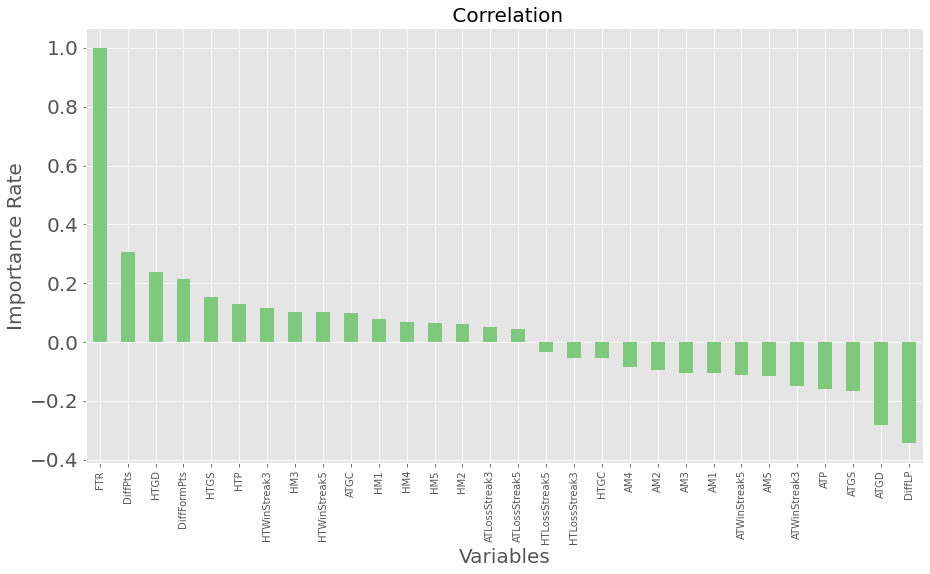

Most Positive Correlations: 
 FTR            1.000000
DiffPts        0.305745
HTGD           0.237344
DiffFormPts    0.213873
HTGS           0.152611
Name: FTR, dtype: float64

Most Negative Correlations: 
 ATWinStreak3   -0.148216
ATP            -0.161323
ATGS           -0.167224
ATGD           -0.281770
DiffLP         -0.344264
Name: FTR, dtype: float64


In [45]:
#VISUALISATION
import matplotlib.pyplot as plt
#df_dum.corr()['is_promoted'].sort_values(ascending = False).plot(kind='bar')
import matplotlib.cm as cm
plt.figure(figsize=(15,8))
plt.style.use('ggplot')
my_cmap = cm.get_cmap('Accent')

correlations = train.corr()['FTR'].sort_values(ascending = False)
correlations.plot(kind='bar', cmap=my_cmap)

plt.title(' Correlation',fontsize=20)
plt.xlabel('Variables', fontsize=20)
plt.ylabel('Importance Rate',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show() 

print('Most Positive Correlations: \n', correlations.head(5))
print('\nMost Negative Correlations: \n', correlations.tail(5))

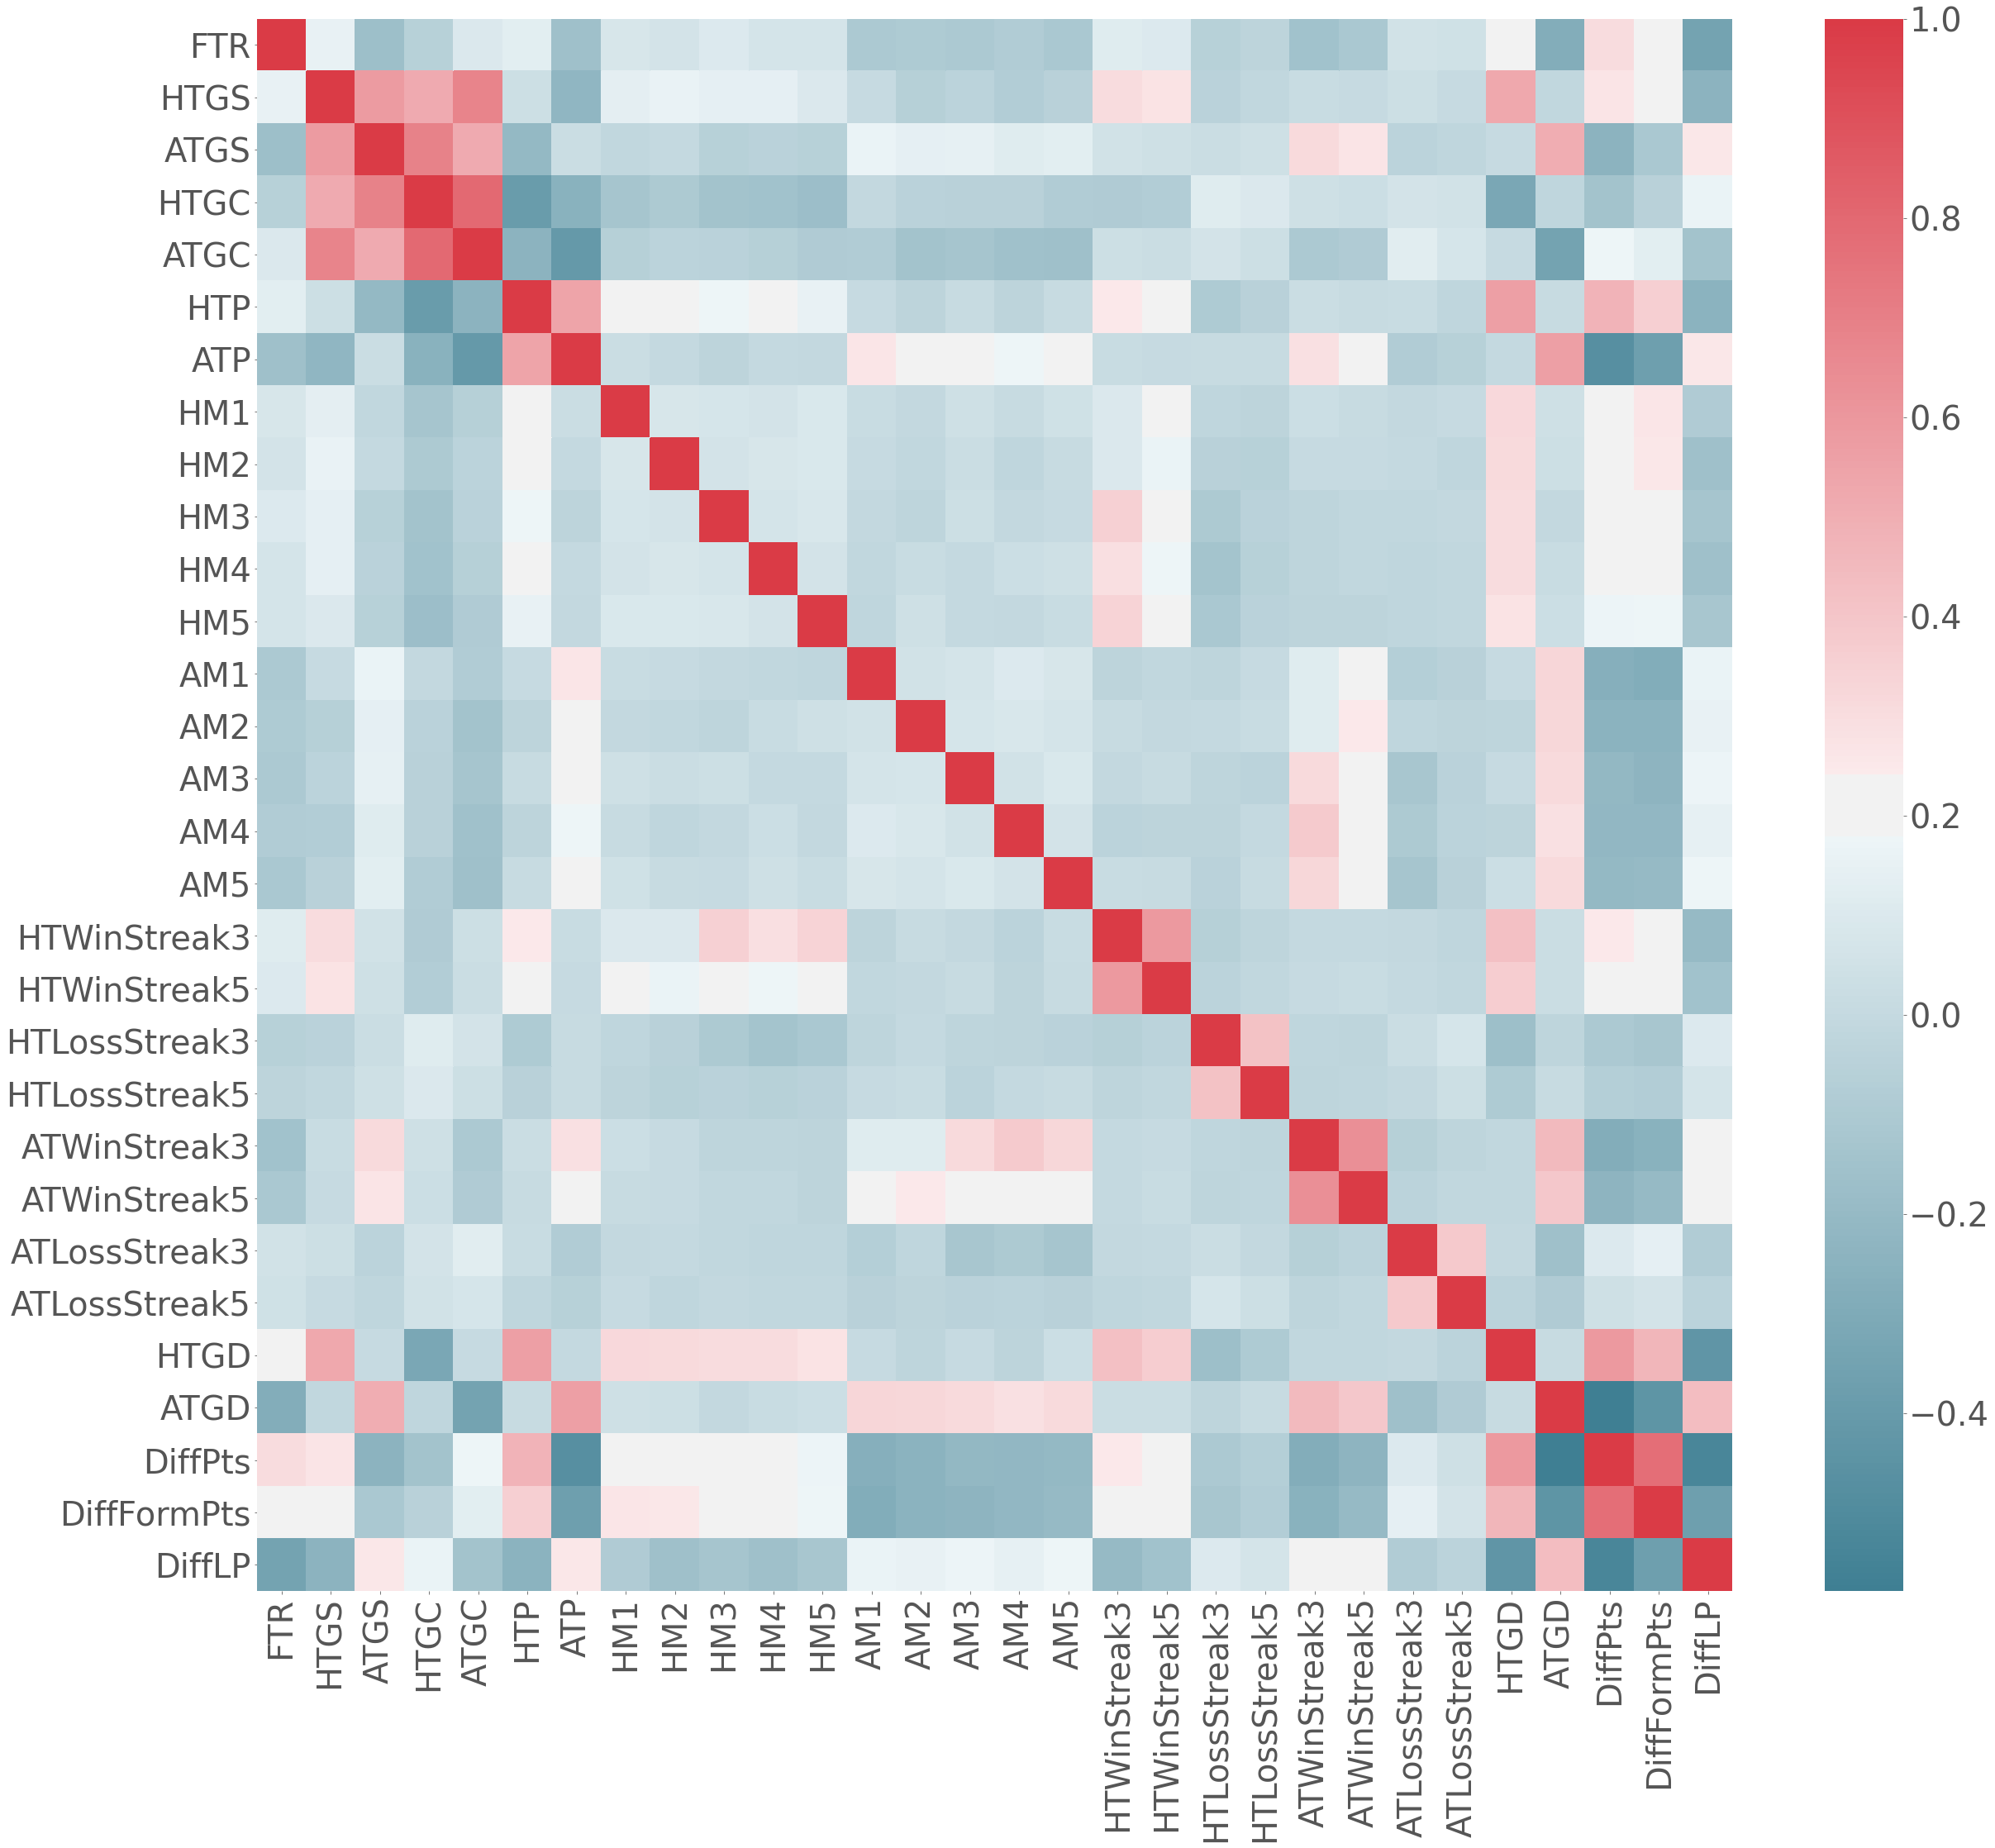

In [46]:
import seaborn as sns
cor = train.corr()
plt.figure(figsize=(40,35))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(cor, annot=False, cmap=cmap)#cmap="YlGnBu")
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 40,rotation=90)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 40,rotation=360)
ax.figure.axes[-1].tick_params(labelsize=40)
plt.savefig('assets/correlation matrix_full_laliga.png',format='png')
plt.show()